In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print(f"Missing values in totalcharges: {df['TotalCharges'].isnull().sum()}")
df.dropna(inplace=True)

Missing values in totalcharges: 11


In [ ]:
df.drop(columns=['customerID'],inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

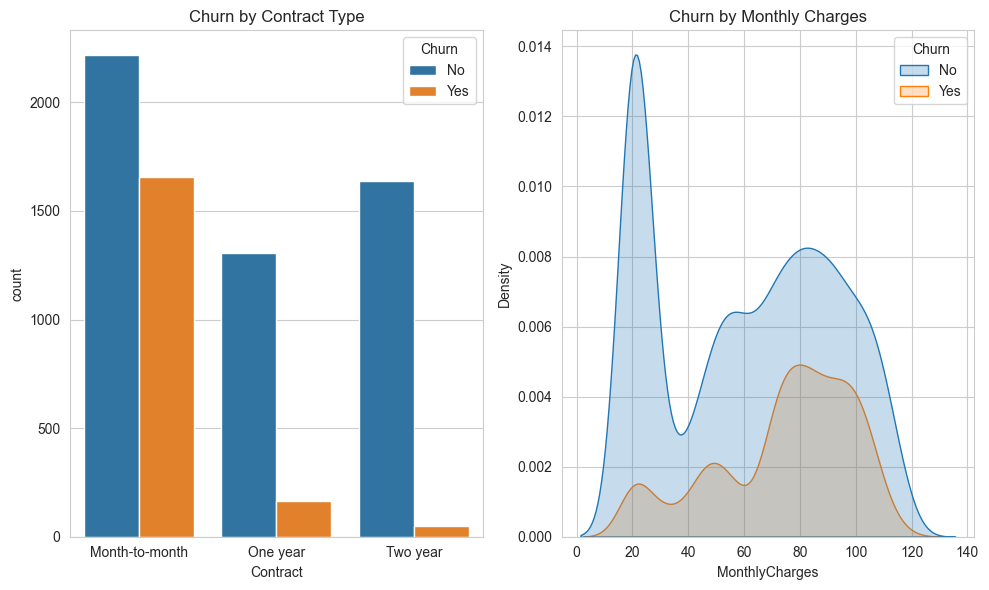

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Churn by Monthly Charges')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn'])
Y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original features: {df.shape[1]}")
print(f"New features count after encoding: {X_train.shape[1]}")
print(f"Training samples: {X_train.shape[0]}")

Original features: 20
New features count after encoding: 30
Training samples: 5625


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, Y_train)
Y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, Y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, Y_train)
Y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,Y_train_smote = smote.fit_resample(X_train_scaled, Y_train)
print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_train_smote.value_counts())

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
1    4130
0    4130
Name: count, dtype: int64


In [ ]:
log_smote = LogisticRegression(random_state=42)
log_smote.fit(X_train_smote, Y_train_smote)
Y_pred_log_smote = log_smote.predict(X_test_scaled)
print("Logistic Regression Classification(SMOTE) Report:")
print(classification_report(Y_test, Y_pred_log_smote))

Logistic Regression Classification(SMOTE) Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [ ]:
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote.fit(X_train_smote, Y_train_smote)
Y_pred_rf_smote = rf_smote.predict(X_test_scaled)
print("Random Forest Classification(SMOTE) Report:")
print(classification_report(Y_test, Y_pred_rf_smote))

Random Forest Classification(SMOTE) Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.58      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [ ]:
import pickle
model_filename = 'churn_model.pkl'
scaler_filename = 'scaler.pkl'
with open (model_filename, 'wb') as model_file:
    pickle.dump(log_smote, model_file)
with open (scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [ ]:
print(X.columns.tolist())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
